### KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# 데이터 생성
n_sample = 300
n_clusters = 3

In [3]:
x, y  =  make_blobs(n_samples=n_sample, centers=n_clusters, random_state=42)


Text(0, 0.5, 'f2')

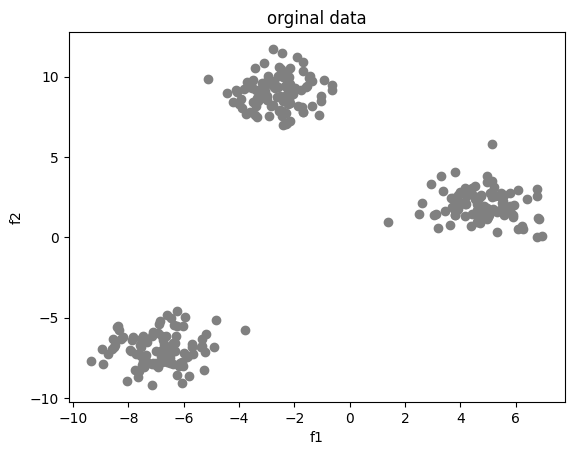

In [4]:
# 그래프
plt.scatter(x[:,0], x[:,1], c='gray', label='original data')
plt.title('orginal data')
plt.xlabel('f1')
plt.ylabel('f2')

In [5]:
# KMeans 객체 생성 -> 학습
kmeans = KMeans(n_clusters=3, random_state=42)

In [7]:
cluster_labels = kmeans.fit_predict(x)

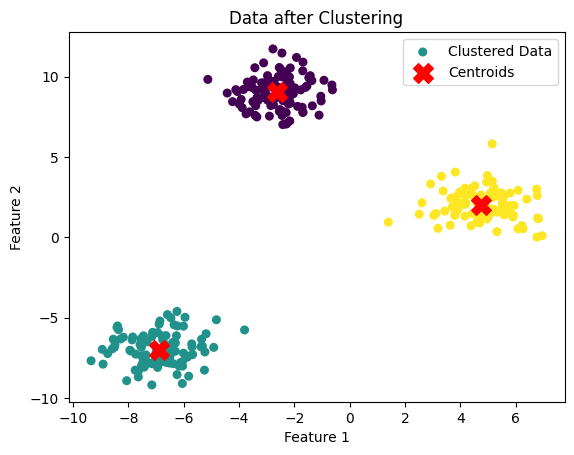

In [9]:
# 4. 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=30, 
label="Clustered Data")
# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


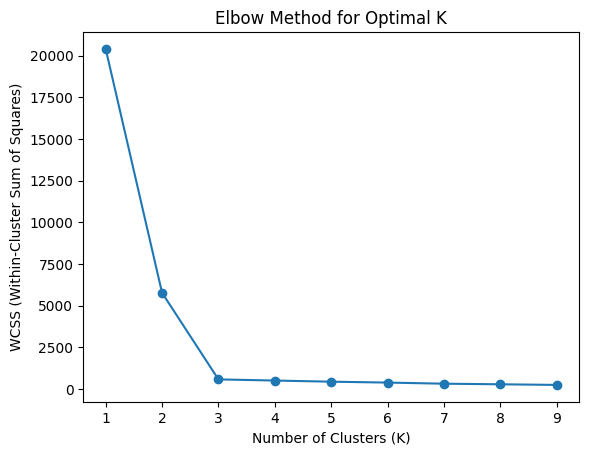

In [14]:
# 6. 최적의 K 값을 찾기 위한 엘보우 방법 (추가 분석)
# 다양한 K 값에 대한 Inertia 계산
wcss=[]
K_range=range(1, 10)
for k in K_range:
    kmeans_temp=KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x)
    wcss.append(kmeans_temp.inertia_)
# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [15]:
# kmeans 평가를 위한 실루엣 점수 확인

from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
# 실루엣 스코어
sil_avg  = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8480303059596955


In [18]:
# 시각화를 위한 점수 계산
sil_values = silhouette_samples(x, cluster_labels)
print(sil_values)

[0.90593228 0.90295138 0.78292932 0.82801009 0.85347199 0.87164904
 0.87660124 0.87599826 0.87967189 0.85542272 0.8185558  0.87259676
 0.74387596 0.84157115 0.90743902 0.87272287 0.87580064 0.72626456
 0.86269038 0.78265318 0.78367684 0.88236857 0.86744598 0.91367619
 0.87177917 0.84973102 0.88991326 0.69411153 0.86247358 0.84701361
 0.85559028 0.86435444 0.88923506 0.81530708 0.84205606 0.84407722
 0.89049865 0.87854612 0.90341598 0.76522292 0.84764565 0.8725714
 0.91062018 0.81940318 0.8287758  0.82800398 0.91293113 0.86613733
 0.9101851  0.81830486 0.87279139 0.85655332 0.90111562 0.76870605
 0.87629642 0.52748913 0.90894375 0.83452366 0.86343982 0.86125249
 0.88918749 0.76979529 0.86487455 0.69836723 0.88372903 0.82959834
 0.85491415 0.88631591 0.8734638  0.86485178 0.85190407 0.85010535
 0.90260065 0.86305493 0.80711153 0.90990924 0.85777116 0.85024895
 0.87568057 0.85626803 0.86869093 0.86376756 0.89694868 0.85592685
 0.86287428 0.88174667 0.87343813 0.75129446 0.81999592 0.82172

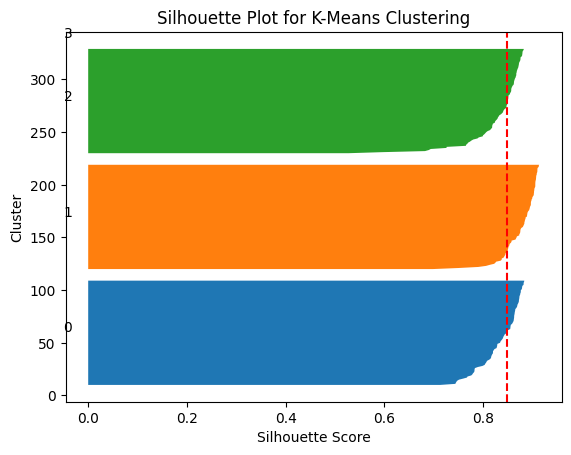

ClusterCenters:
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
SilhouetteScore for each point stored as silhouette_valuesarray.


In [ ]:
# 시각화 준비
y_lower=10

for i in range(4): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values=sil_values[cluster_labels==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower + size_cluster_i
    
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i)) # 클러스터 번호
    y_lower=y_upper+10 # 다음 클러스터로 이동
    
    
# 그래프 설정
plt.axvline(x=sil_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()
# 5. 결과 요약 -실루엣 점수와 클러스터 중심 출력
print(f"ClusterCenters:\n{kmeans.cluster_centers_}")
print(f"SilhouetteScore for each point stored as silhouette_valuesarray.")


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [22]:
iris = load_iris()

x = iris.data
y = iris.target



In [23]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [24]:
# 2 차원으로 축소
pca = PCA(n_components=2)

In [25]:
x_pca = pca.fit_transform(x_scaler)

In [26]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


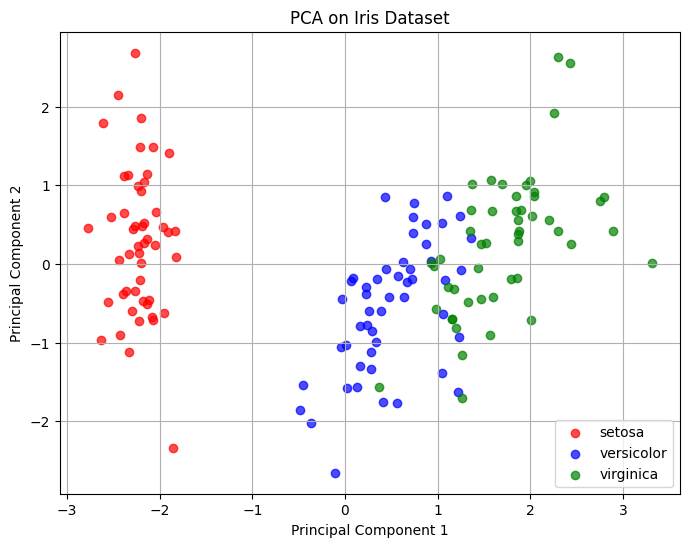

In [27]:
# 5. PCA 결과 시각화
# -두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], 
    iris.target_names):
    plt.scatter(x_pca[y == target, 0], # 첫 번째 주성분
    x_pca[y == target, 1], # 두 번째 주성분
    color=color, label=label, alpha=0.7)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

### 이상치 탐지를 위한 Isolation forest


In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [29]:
np.random.seed(42)

In [33]:
# 정상 100개, 이상 10개 -> 2차원
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
print(normal_traffic) 
ano_traffic = np.random.uniform(low = 100, high=150, size=(10,2))
print(ano_traffic)

[[53.32314012 42.51513463]
 [65.51151976 51.15674634]
 [61.79297184 50.67518481]
 [70.60747925 67.55340842]
 [47.51035852 59.71570951]
 [56.4537595  63.68631558]
 [40.35076539 56.8605146 ]
 [60.58424487 32.41260514]
 [38.16741487 29.60767822]
 [47.30593166 57.17542256]
 [65.02357052 50.7409478 ]
 [66.28615546 36.19898542]
 [32.96617561 49.44452301]
 [53.84065449 49.67305252]
 [29.325579   49.1087996 ]
 [36.95530499 56.69672549]
 [53.66598246 40.60120214]
 [44.86133083 39.40786478]
 [49.37320903 59.55142321]
 [40.14273954 55.04046516]
 [44.69742382 42.07127168]
 [48.9296964  39.64757678]
 [44.46350695 38.02122107]
 [69.64725133 50.35263552]
 [43.00274492 52.13979911]
 [48.8767195  47.790304  ]
 [56.141667   57.5750771 ]
 [44.69498852 44.24181759]
 [47.24948303 26.98078835]
 [34.84808938 63.66874267]
 [66.44967714 47.5096396 ]
 [55.76556963 53.11250155]
 [80.78880808 61.19574911]
 [48.72082409 40.44459559]
 [33.9355368  52.03463636]
 [42.43649255 35.7774629 ]
 [43.53427116 39.18451996]
 

In [35]:
from matplotlib.cm import ColormapRegistry


traffic_data = np.vstack((normal_traffic, ano_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count','Response Time'])


In [36]:
model = IsolationForest(n_estimators=100, contamination=0.1,random_state=42)

In [37]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [38]:
traffic_df

,Request Count,Response Time,Anomaly Score
0,53.323140,42.515135,1
1,65.511520,51.156746,1
2,61.792972,50.675185,1
3,70.607479,67.553408,1
4,47.510359,59.715710,1
...,...,...,...
105,128.814418,130.335752,-1
106,121.206534,136.822212,-1
107,146.718351,146.278426,-1
108,122.541969,105.661902,-1


In [40]:
traffic_df['Request Count'].min()
traffic_df['Request Count'].max()

np.float64(149.24205994811672)

In [41]:
traffic_df.shape

(110, 3)

In [42]:
traffic_df.describe()

,Request Count,Response Time,Anomaly Score
count,110.000000,110.000000,110.000000
mean,57.352687,56.352803,0.800000
std,25.736744,26.132399,0.602746
min,25.283555,26.980788,-1.000000
25%,44.115117,41.454760,1.000000
50%,52.476685,49.444338,1.000000
75%,58.611275,57.675258,1.000000
max,149.242060,146.278426,1.000000


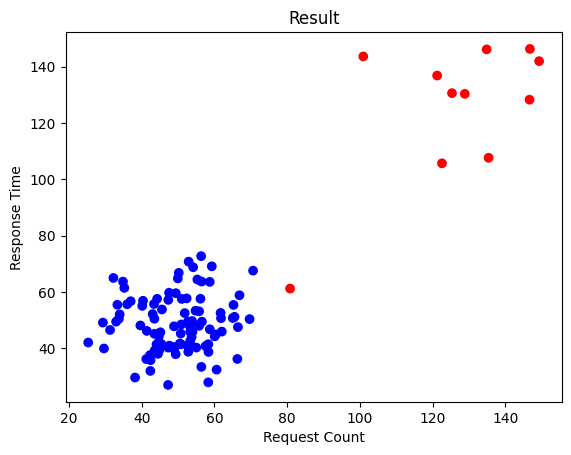

In [43]:
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'],
    c=traffic_df['Anomaly Score'].map({1:'blue', -1:'red'}),
    label='Traffic'
)

plt.title('Result')
plt.xlabel('Request Count')
plt.ylabel('Response Time')

plt.show()

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=15, min_samples=5)

In [46]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [47]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster
0        53.323140      42.515135              1        0
1        65.511520      51.156746              1        0
2        61.792972      50.675185              1        0
3        70.607479      67.553408              1        0
4        47.510359      59.715710              1        0
..             ...            ...            ...      ...
105     128.814418     130.335752             -1       -1
106     121.206534     136.822212             -1       -1
107     146.718351     146.278426             -1       -1
108     122.541969     105.661902             -1       -1
109     149.242060     141.944904             -1       -1

[110 rows x 4 columns]


In [48]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

In [49]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster  Anomaly
0        53.323140      42.515135              1        0   Normal
1        65.511520      51.156746              1        0   Normal
2        61.792972      50.675185              1        0   Normal
3        70.607479      67.553408              1        0   Normal
4        47.510359      59.715710              1        0   Normal
..             ...            ...            ...      ...      ...
105     128.814418     130.335752             -1       -1  Anomaly
106     121.206534     136.822212             -1       -1  Anomaly
107     146.718351     146.278426             -1       -1  Anomaly
108     122.541969     105.661902             -1       -1  Anomaly
109     149.242060     141.944904             -1       -1  Anomaly

[110 rows x 5 columns]


In [50]:
anomalout_data = traffic_df[traffic_df['Anomaly'] == 'Anomaly']

In [ ]:
min_request_count = anomalout_data['Request Count'].min()
max_request_count = anomalout_data['equest Count'].max()
min_response_time = anomalout_data['Response Time'].min()
max_response_time = anomalout_data['Response Time'].max()

print(f"비정상 데이터 범위:")
print(f"-요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"-응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projec

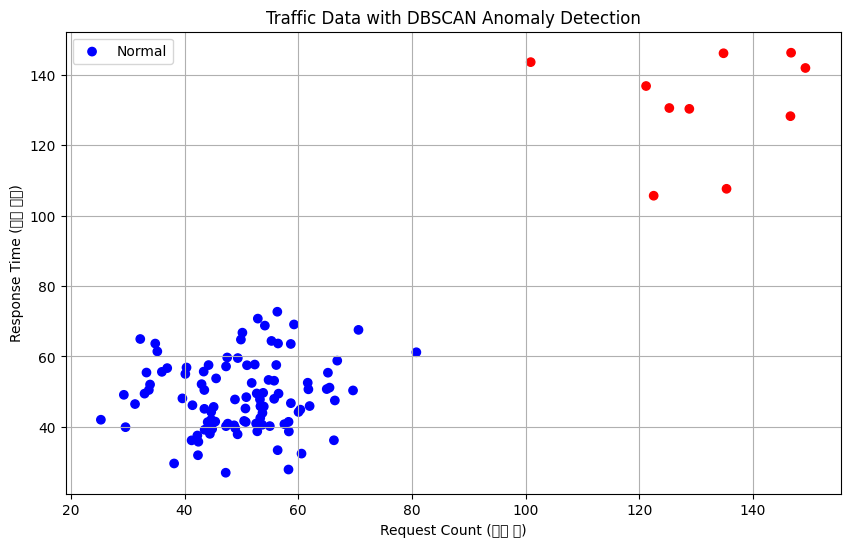

In [52]:
# 4. 시각화
plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df["Request Count"], traffic_df["Response Time"],
    c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly": 
"red"}), # 색상 매핑
    label="Traffic"
)
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()